# Filtering, Grouping & Merging with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/jd/f_y1zkqx7qj3nlzj3h0lgsbc0000gn/T/ipykernel_71080/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


* create a folder named data in the same directory as your notebook 
* download Archive.zip into it
* extract the contents of Archive.zip (may take a minute or two)

In [2]:
cast = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Data/cast.csv')
cast.head(3)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [3]:
len(cast)

3442902

In [5]:
cast.count()

title        3442896
year         3442902
name         3442902
type         3442902
character    3442894
n            2115119
dtype: int64

In [6]:
cast.size

20657412

In [7]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


### basic operations
* df.head([optional value])
* df.tail([optional value])
* df['column name'] or df.column_name to subset by columns
* df[['col1, col2, col...']]
* df[column.isnull()]
* df[column.notnull()]
* df[column == some value] 
* df[(df.column > some value) & (df.column < some value)]
* df.sort_values(by=column, ascending=False) # for descending order
* df['column'].str.any_string_method
* df.index --> returns the index of df or subset
* df.sort_index()
* df.plot --> wrapper around matplotlib
* df.groupby --> allows grouping and aggregation, similar to pivot table
* df.set_index --> easily change index on the fly, can be multi-indexed
* unstack --> must be used on multi-index post aggregation
* df.reset_index --> resets index to integer based
* pd.pivot_table --> pass thi top level function a df, works as pivot table (try help)

In [9]:
mask = cast['n'].isnull()
cast[mask]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
3442886,Svanurinn,2017,Katla M. Þorgeirsdóttir,actress,Ólöf,NaN
3442892,Foreldrar,2007,Lilja Guðrún Þorvaldsdóttir,actress,Katrin Eldri,NaN
3442893,Rokland,2011,Lilja Guðrún Þorvaldsdóttir,actress,Aðalbjörg - Dagga's Mother,NaN
3442894,XL,2013,Lilja Guðrún Þorvaldsdóttir,actress,Tengdamamma,NaN


In [12]:
cast[~mask].head(100)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
...,...,...,...,...,...,...
166,Mannamkattayum Kariyilayum: The clod and the d...,2017,Joby A S,actor,Balan,4.0
168,Lady Blues,1996,Charles A'Lexis,actor,Clerk,15.0
171,Out for Vengeance,2017,Hassan A,actor,Agent Max,28.0
176,Miami Shakedown,1993,A-Hito,actor,Tennis Trainer,23.0


In [13]:
cast[~mask].head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
16,My Song for You,2010,George 'Bootsy' Thomas,actor,Cooley's Customer,16.0
17,My Song for You,2010,George 'Bootsy' Thomas,actor,Celebration Guest,16.0
19,Mariano Mison... NBI,1997,Joseph 'Byron' Sese,actor,Putik's Son,31.0
25,Pelotazo nacional,1993,Félix 'El Gato',actor,Rebolledo,12.0


In [14]:
titles = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Data/titles.csv')

In [15]:
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [16]:
titles[titles['year']<1900]

,title,year
60945,Reproduction of the Corbett and Jeffries Fight,1899
72324,Miss Jerry,1894
160829,The Startled Lover,1898


In [22]:
years = titles['year'].value_counts().sort_index()

<Axes: xlabel='year'>

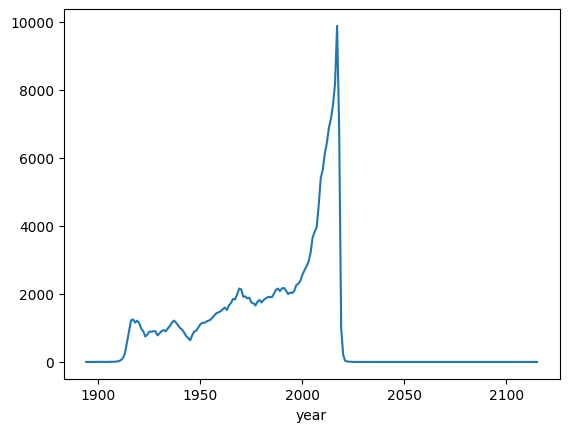

In [24]:
years.plot()

In [21]:
titles[titles['year']>2024]

,title,year
60046,100 Years,2115
67170,Avatar 5,2025
125751,The Zero Century: Maetel,2026


In [26]:
titles[(titles['year']>= 2017) &(titles['year'] < 2020)]

,title,year
8,Pinsky,2017
23,Lost & Found,2017
49,Cold Zone,2017
57,Vilayattu Aarambam,2017
58,Under the Big Sky,2017
...,...,...
225982,Torn (VII),2017
225991,The Murder Men,2017
225995,La Palabra de Pablo,2018
225996,The Syriana Tate Interview,2017


In [27]:
titles[titles['year'] == 2018] 

,title,year
112,Alex Winter,2018
170,The Queen's Physician,2018
175,Unda,2018
177,The Hunt and Hunted,2018
228,Drive,2018
...,...,...
225820,Coffee Will Make You Black,2018
225873,Nevermind,2018
225900,Frogs to Princesses,2018
225903,700 Horses,2018


In [29]:
titles[(titles['year']== 2017) | (titles['year'] == 2020)].sort_values(by='year')

,title,year
8,Pinsky,2017
146945,Morcha marathi movie,2017
146949,Chandraboti Kotha,2017
146955,Untitled Dirt Track,2017
146960,Life Class 1919,2017
...,...,...
185280,Love And Borders,2020
132883,Nicktoons,2020
168428,Aces & Eights,2020
146537,Nimona,2020


In [35]:
titles['decade'] = (titles['year'] / 10).astype(int) * 10
titles

,title,year,decade
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990
...,...,...,...
226008,Armageddon,1969,1960
226009,Verit i znat,1986,1980
226010,Muukalainen,2008,2000
226011,Byeolmyeongbuteun unjeonsa,1977,1970


In [33]:
titles['year'] // 10 * 10

0         1950
1         1910
2         2000
3         1990
4         1990
          ... 
226008    1960
226009    1980
226010    2000
226011    1970
226012    1930
Name: year, Length: 226013, dtype: int64

In [40]:
titles['decade'].value_counts().sort_index()

decade
1890        3
1900       39
1910     6752
1920     8954
1930    10245
1940     8561
1950    12664
1960    17419
1970    18476
1980    19532
1990    21547
2000    35730
2010    65830
2020      260
2110        1
Name: count, dtype: int64

In [41]:
titles[titles['title'] == 'Batman']

,title,year,decade
22312,Batman,1989,1980
136696,Batman,1943,1940


In [56]:
titles[titles['title'].str.contains("Batman", na=False)]

,title,year,decade
10949,Batman Ninja,2018,2010
19248,Batman Fights Dracula,1967,1960
22312,Batman,1989,1980
32277,Batman and Robin,1949,1940
43500,Batman: Return of the Caped Crusaders,2016,2010
47724,Batman: Mask of the Phantasm,1993,1990
48410,Batman: Master of Fear,2017,2010
51771,Batman Revealed,2012,2010
52530,Batman Forever,1995,1990
59736,James Batman,1966,1960


In [50]:
c = cast.set_index(['name', 'year'])
c

title     type  \
name                        year                                              
Buffy #1                    2015                    Closet Monster    actor   
Homo $                      1985                   Suuri illusioni    actor   
$hutter                     2017               Battle of the Sexes    actor   
                            2015              Secret in Their Eyes    actor   
                            2015                        Steve Jobs    actor   
...                                                            ...      ...   
Lilja Þórisdóttir           1988                           Foxtrot  actress   
Sigríður Jóna Þórisdóttir   2004  Niceland (Population. 1.000.002)  actress   
Dalla Þórðardóttir          1985                         Skammdegi  actress   
Kristín Andrea Þórðardóttir 2003                      U.S.S.S.S...  actress   
Rosa á Rógvu                1999                 Bye Bye Blue Bird  actress   

                                                character     n  
name                        year                                 
Buffy #1                    2015                  Buffy 4  31.0  
Homo $                      1985                   Guests  22.0  
$hutter                     2017          Bobby Riggs Fan  10.0  
                            2015          2002 Dodger Fan   NaN  
                            2015  1988 Opera House Patron   NaN  
...                                                   ...   ...  
Lilja Þórisdóttir           1988                     Dóra  24.0  
Sigríður Jóna Þórisdóttir   2004             Woman in Bus  26.0  
Dalla Þórðardóttir          1985            Hjúkrunarkona   9.0  
Kristín Andrea Þórðardóttir 2003   Afgr.dama á bensínstöð  17.0  
Rosa á Rógvu                1999        Pensionatværtinde   NaN  

[3442902 rows x 4 columns]

In [51]:
c.reset_index()

,name,year,title,type,character,n
0,Buffy #1,2015,Closet Monster,actor,Buffy 4,31.0
1,Homo $,1985,Suuri illusioni,actor,Guests,22.0
2,$hutter,2017,Battle of the Sexes,actor,Bobby Riggs Fan,10.0
3,$hutter,2015,Secret in Their Eyes,actor,2002 Dodger Fan,NaN
4,$hutter,2015,Steve Jobs,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3442897,Lilja Þórisdóttir,1988,Foxtrot,actress,Dóra,24.0
3442898,Sigríður Jóna Þórisdóttir,2004,Niceland (Population. 1.000.002),actress,Woman in Bus,26.0
3442899,Dalla Þórðardóttir,1985,Skammdegi,actress,Hjúkrunarkona,9.0
3442900,Kristín Andrea Þórðardóttir,2003,U.S.S.S.S...,actress,Afgr.dama á bensínstöð,17.0


In [52]:
cast[['year','title']]

,year,title
0,2015,Closet Monster
1,1985,Suuri illusioni
2,2017,Battle of the Sexes
3,2015,Secret in Their Eyes
4,2015,Steve Jobs
...,...,...
3442897,1988,Foxtrot
3442898,2004,Niceland (Population. 1.000.002)
3442899,1985,Skammdegi
3442900,2003,U.S.S.S.S...


In [53]:
cast.groupby(['title', 'type']).size().unstack()

type,actor,actress
title,,
#211,NaN,8.0
#5,2.0,NaN
#50Fathers,29.0,11.0
#66,12.0,2.0
"#73, Shaanthi Nivaasa",10.0,4.0
...,...,...
whiteonwhite:algorithmicnoir,1.0,1.0
www.XXX.com,2.0,3.0
xXx,62.0,10.0


In [54]:
pd.concat([titles, cast])

,title,year,decade,name,type,character,n
0,Ankara ekspresi,1952,1950.0,NaN,NaN,NaN,NaN
1,"Ans Vaterland, ans teure",1915,1910.0,NaN,NaN,NaN,NaN
2,Miss Mohini,2002,2000.0,NaN,NaN,NaN,NaN
3,La vera madre,1999,1990.0,NaN,NaN,NaN,NaN
4,O Amerikanos,1993,1990.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,NaN,Lilja Þórisdóttir,actress,Dóra,24.0
3442898,Niceland (Population. 1.000.002),2004,NaN,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0
3442899,Skammdegi,1985,NaN,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0
3442900,U.S.S.S.S...,2003,NaN,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0
